# RNN 遞歸神經網路

### STEP1. 載入 Minist 資料集

In [21]:
import keras
from keras.layers import LSTM
from keras.layers import Dense, Activation
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
 
# 測試資料 (長)
n_input = 28

# 測試資料 (寬)
n_step = 28

# 隱藏層數
n_hidden = 128

# 類別數
n_classes = 10

# 學習率
learning_rate = 0.001

# 訓練次數
training_iters = 2

# 測試集大小
batch_size = 128

# 讀取資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### STEP2. 資料讀取與轉換

In [22]:
x_train = x_train.reshape(-1, n_step, n_input)
x_test = x_test.reshape(-1, n_step, n_input)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

### STEP3. 建立與設定 LSTM Model

In [23]:
model = Sequential()
model.add(LSTM(n_hidden,
               batch_input_shape=(None, n_step, n_input),
               unroll=True))
 
model.add(Dense(n_classes))
model.add(Activation('softmax'))
 
adam = Adam(lr=learning_rate)
model.summary()
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


### STEP4. 定義訓練並進行訓練 

In [24]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=training_iters,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 34s 572us/step - loss: 0.5325 - acc: 0.8255 - val_loss: 0.1835 - val_acc: 0.9406
Epoch 2/2
60000/60000 [==============================] - 25s 413us/step - loss: 0.1500 - acc: 0.9545 - val_loss: 0.1197 - val_acc: 0.9619


### STEP5. 顯示訓練結果

10000/10000 [==============================] - 2s 243us/step

	[Info] Accuracy of testing data = 96.3%
	[Info] Making prediction of x_test

	[Info] Show 10 prediction result (From 250):
[4 1 9 5 7 7 2 8 2 0]



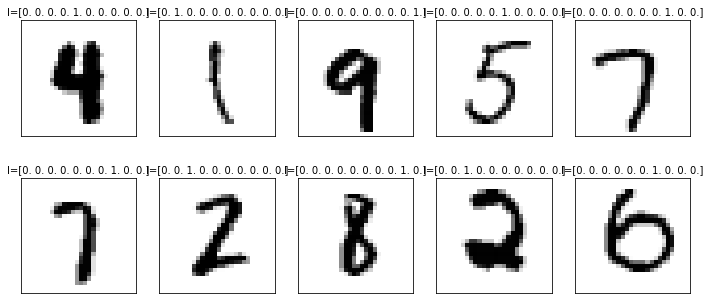

In [20]:
import matplotlib.pyplot as plt  
import tensorflow as tf


    
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])    
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
plt.show()  

scores = model.evaluate(x_test, y_test)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))   

print("\t[Info] Making prediction of x_test")  
prediction = model.predict_classes(x_test)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 250):")  
print("%s\n" % (prediction[250:260]))
plot_images_labels_predict(x_test, y_test, prediction, idx=250)  

### STEP6. 儲存訓練結果

In [25]:
model.save_weights('/tmp/RNN_Mnist.h5')